# Task 4 

## part 1

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.decomposition import PCA
import math

In [3]:
data = np.loadtxt('takens_1.txt')
x = data[:, 0]
y = data[:, 1]
time = np.arange(1,len(data)+1)

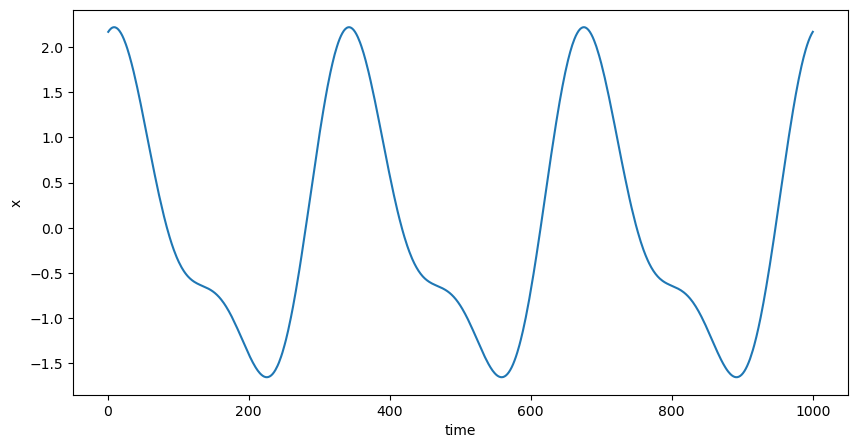

In [11]:
fig = plt.figure(figsize=(10, 5))
plt.plot(time, x)
plt.xlabel('time')
plt.ylabel('x')
plt.show()

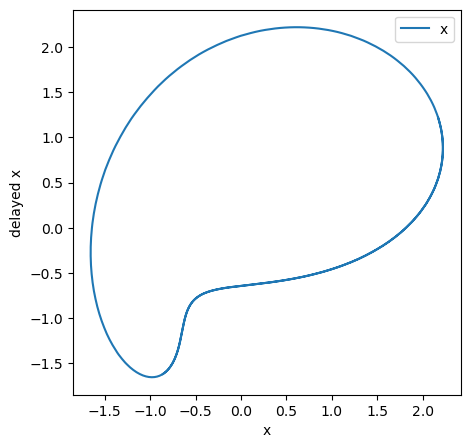

In [13]:
x1 = x[0:500]
x2 = x[50:550]
fig = plt.figure(figsize=(5, 5))
plt.plot(x1, x2)
plt.xlabel('x')

plt.ylabel('delayed x')
plt.legend(('x', 'y'))
plt.show()

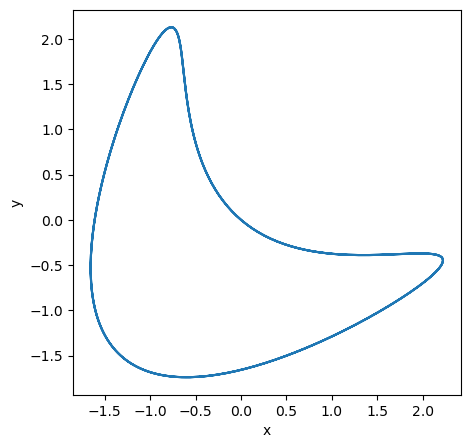

In [12]:
fig = plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## part 2

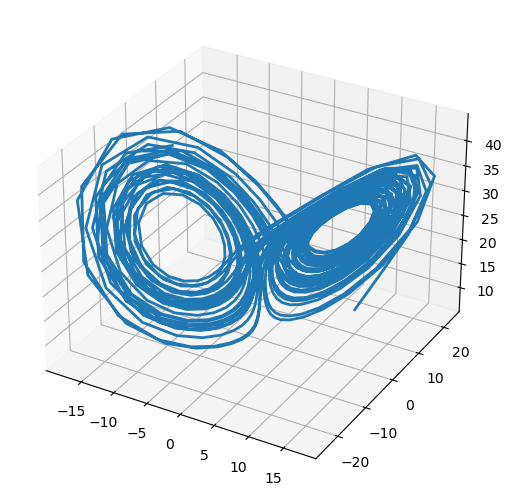

In [42]:
def lorenz_deriv(t0, x_y_z, sigma=10.0, beta=8./3, rho=28.0):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

x0 = [[10,10,10]]
t = np.linspace(0, 40, 1000)
x_t = np.asarray([solve_ivp(fun=lorenz_deriv, t_span=[0, 1000], y0=val, t_eval=t) for val in x0])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
N = len(x0)
colors = plt.cm.viridis(np.linspace(0, 1, N))
for i in range(N):
    x = x_t[i].y[0, :]
    y = x_t[i].y[1, :]
    z = x_t[i].y[2, :]
    lines = ax.plot(x, y, z)
    plt.setp(lines, linewidth=2)

In [43]:
def shift_arr(x, step):
    a=0
    b=500
    x1 = x[a:b]
    x2 = x[a+step:b+step]
    x3 = x[a+2*step:b+2*step]
    return np.array([x1,x2,x3])

[None]

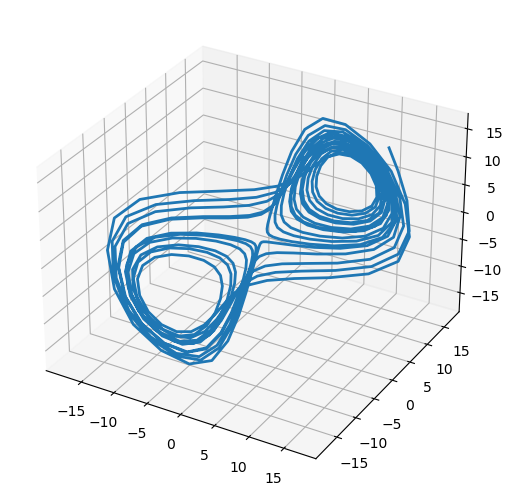

In [44]:
x_bundle = shift_arr(x, 3)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
x_1 = x_bundle[0, :]
y_1 = x_bundle[1, :]
z_1 = x_bundle[2, :]
lines = ax.plot(x_1, y_1, z_1)
plt.setp(lines, linewidth=2)
        

[None]

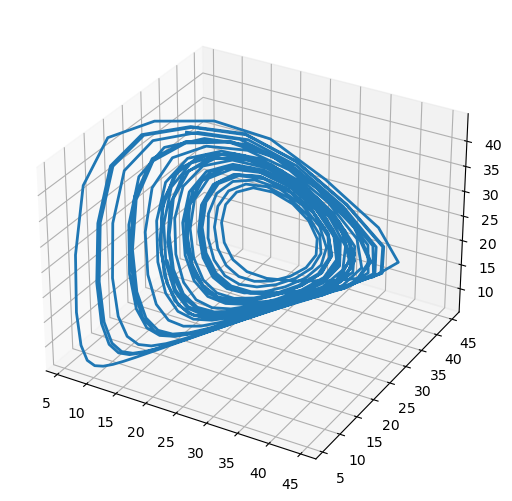

In [45]:
z_bundle = shift_arr(z, 3)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
x_2 = z_bundle[0, :]
y_2 = z_bundle[1, :]
z_2 = z_bundle[2, :]
lines = ax.plot(x_2, y_2, z_2)
plt.setp(lines, linewidth=2)